# Setup

In [2]:
import sys, os
from pyrosm import get_data, OSM
from pyrosm.data import sources
import geopandas as gpd
sys.path.append('..')
from utils.constants import *

In [3]:
osm_input_dir = VECTOR_INPUT_DIR / "OSM"
osm_dir = VECTOR_INPUT_DIR / "OSM"
gadm_dir = VECTOR_INPUT_DIR / "GADM"
# cambridgeshire_osm_path = get_data("cambridgeshire", directory=osm_input_dir) # Run only once
cambridgeshire_osm_path = osm_dir / "cambridgeshire-latest.osm.pbf"
london_osm_path = get_data("london", directory=osm_input_dir)
calabar_osm_path = osm_dir / "calabar.osm.pbf"
gadm_path = gadm_dir / "gadm_410.gpkg"

Downloaded Protobuf data 'London.osm.pbf' (118.84 MB) to:
'/maps/acz25/phd-thesis-data/input/vector/OSM/London.osm.pbf'


In [3]:
gadm_gdf = gpd.read_file(gadm_path)
gadm_gdf

,UID,GID_0,NAME_0,VARNAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,ISO_1,HASC_1,...,ENGTYPE_5,GOVERNEDBY,SOVEREIGN,DISPUTEDBY,REGION,VARREGION,COUNTRY,CONTINENT,SUBCONT,geometry
0,1,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((71.41149 36.55717, 71.40954 36..."
1,2,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((71.27620 38.00465, 71.27578 38..."
2,3,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((70.78272 37.27678, 70.78635 37..."
3,4,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((71.41149 36.55717, 71.40091 36..."
4,5,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((70.71236 37.07621, 70.73582 37..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356503,356504,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((29.75637 -20.33492, 29.75664 -..."
356504,356505,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((29.84425 -20.10055, 29.84955 -..."
356505,356506,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((30.03103 -20.27994, 30.03089 -..."
356506,356507,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((30.08165 -20.19866, 30.08120 -..."


<Axes: >

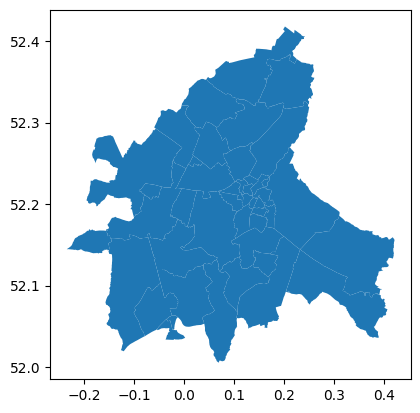

In [4]:
gadm_gdf[(gadm_gdf['NAME_3'].isin(['Cambridge', 'South Cambridgeshire'])) & (gadm_gdf['NAME_0'] == 'United Kingdom')].plot()

In [5]:
cambridgeshire_bbox = gadm_gdf[(gadm_gdf['NAME_3'].isin(['Cambridge', 'South Cambridgeshire'])) & (gadm_gdf['NAME_0'] == 'United Kingdom')].total_bounds
cambridgeshire_bbox
# from shapely.geometry import Polygon

# cambridgeshire_bbox_gdf = gpd.GeoDataFrame({'geometry': [Polygon([(cambridgeshire_bbox[0], cambridgeshire_bbox[1]), (cambridgeshire_bbox[0], cambridgeshire_bbox[3]),
#                                                                   (cambridgeshire_bbox[2], cambridgeshire_bbox[3]), (cambridgeshire_bbox[2], cambridgeshire_bbox[1])])]}, 
#                                                                   crs="EPSG:4326")
# cambridgeshire_bbox_gdf.plot()

array([-0.23480404, 52.00578874,  0.42088639, 52.41784352])

In [6]:
cambridgeshire_osm = OSM(str(cambridgeshire_osm_path))

## Road Network

/maps/acz25/miniconda3/envs/nature-urban-geo-env/lib/python3.10/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


<Axes: >

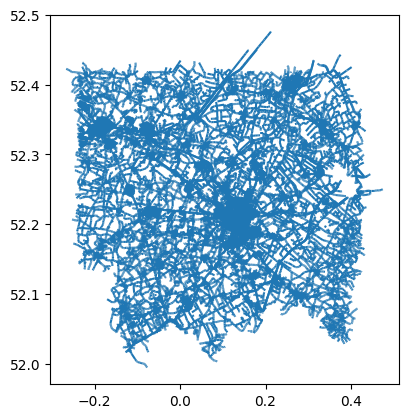

In [7]:
network = cambridgeshire_osm.get_network()
network = network.cx[cambridgeshire_bbox[0]:cambridgeshire_bbox[2], cambridgeshire_bbox[1]:cambridgeshire_bbox[3]]
network.plot()

## Buildings

In [8]:
buildings = cambridgeshire_osm.get_buildings()
buildings = buildings.cx[cambridgeshire_bbox[0]:cambridgeshire_bbox[2], cambridgeshire_bbox[1]:cambridgeshire_bbox[3]]

In [9]:
buildings.columns

Index(['addr:city', 'addr:country', 'addr:full', 'addr:housenumber',
       'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email',
       'name', 'opening_hours', 'operator', 'phone', 'ref', 'url', 'visible',
       'website', 'building', 'amenity', 'building:flats', 'building:levels',
       'building:material', 'building:min_level', 'building:use', 'craft',
       'height', 'internet_access', 'landuse', 'levels', 'office', 'shop',
       'source', 'start_date', 'wikipedia', 'id', 'timestamp', 'version',
       'tags', 'osm_type', 'geometry', 'changeset'],
      dtype='object')

## Land Use

In [10]:
land_use = cambridgeshire_osm.get_landuse()
land_use = land_use.cx[cambridgeshire_bbox[0]:cambridgeshire_bbox[2], cambridgeshire_bbox[1]:cambridgeshire_bbox[3]]

<Axes: >

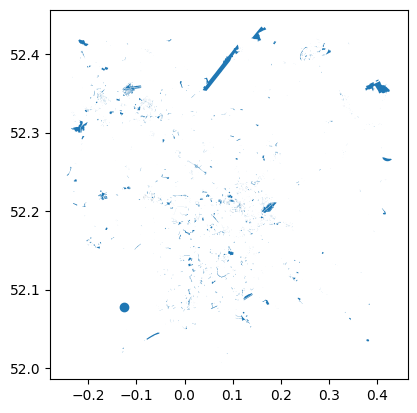

In [11]:
x = land_use[land_use['landuse'].isin(['forest', 'grass', 'park'])]
x.plot()

In [12]:
x

,timestamp,changeset,tags,lon,lat,visible,version,id,industrial,landuse,...,commercial,construction,depot,farmland,grass,meadow,military,port,railway,village_green
52,1213032312,0.0,"{""created_by"":""Potlatch 0.9c"",""name"":""Tween To...",-0.125957,52.077374,False,3,269372251,None,forest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,1531597793,NaN,"{""visible"":false}",NaN,NaN,NaN,2,3869847,None,grass,...,None,None,None,None,None,None,None,None,None,None
403,1531597793,NaN,"{""visible"":false}",NaN,NaN,NaN,2,3869848,None,grass,...,None,None,None,None,None,None,None,None,None,None
404,1531597793,NaN,"{""visible"":false}",NaN,NaN,NaN,3,3869968,None,grass,...,None,None,None,None,None,None,None,None,None,None
405,1531597793,NaN,"{""visible"":false}",NaN,NaN,NaN,2,3869969,None,grass,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52426,1709811753,0.0,"{""type"":""multipolygon""}",NaN,NaN,NaN,1,21884966922,NaN,grass,...,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
52430,1713642607,0.0,"{""leisure"":""park"",""name"":""Mill Green"",""type"":""...",NaN,NaN,NaN,1,22476624574,NaN,grass,...,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
52434,1721307320,0.0,"{""type"":""multipolygon""}",NaN,NaN,NaN,1,23431130943,NaN,grass,...,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
52437,1722422859,0.0,"{""type"":""multipolygon""}",NaN,NaN,NaN,1,23592069634,NaN,grass,...,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


## Points of Interest

In [13]:
pois = cambridgeshire_osm.get_pois()

In [14]:
network

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
1,None,None,no,None,None,None,None,None,None,trunk,...,None,None,None,1881406,1703282553,32,"{""visible"":false,""alt_description"":""Ipswich - ...",way,"MULTILINESTRING ((0.21615 52.21418, 0.21414 52...",3874.0
2,None,None,None,None,None,None,None,None,None,trunk,...,None,None,None,1881407,1703282554,22,"{""visible"":false,""expressway"":""yes"",""maxheight...",way,"MULTILINESTRING ((0.21613 52.21428, 0.21776 52...",507.0
3,None,None,None,None,None,None,None,None,None,tertiary,...,None,None,None,1881413,1585741165,6,"{""visible"":false,""direction"":""clockwise""}",way,"MULTILINESTRING ((-0.01841 52.21886, -0.01830 ...",43.0
4,None,None,None,None,None,None,None,None,None,tertiary,...,None,None,None,1881414,1712700245,11,"{""visible"":false,""maxspeed:type"":""GB:nsl_single""}",way,"MULTILINESTRING ((-0.00001 52.21969, 0.00007 5...",31.0
5,None,None,None,None,None,None,None,None,None,trunk,...,None,None,None,1881417,1696388086,28,"{""visible"":false,""fut_ref"":""A1428"",""national_h...",way,"MULTILINESTRING ((-0.23060 52.22466, -0.22990 ...",48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122998,private,None,None,None,None,None,None,None,None,footway,...,None,None,None,1317413960,1727022854,1,"{""visible"":false}",way,"MULTILINESTRING ((0.19111 52.06202, 0.19140 52...",33.0
122999,private,None,None,None,None,None,None,None,None,footway,...,None,None,None,1317413961,1727022854,1,"{""visible"":false}",way,"MULTILINESTRING ((0.19113 52.06167, 0.19123 52...",8.0
123000,private,None,None,None,None,None,None,None,None,footway,...,None,None,None,1317413962,1727022854,1,"{""visible"":false,""covered"":""yes""}",way,"MULTILINESTRING ((0.19123 52.06171, 0.19130 52...",6.0
123001,None,None,None,None,None,None,None,None,None,footway,...,None,None,None,1317419371,1727024838,1,"{""visible"":false}",way,"MULTILINESTRING ((0.31698 52.21696, 0.31552 52...",257.0


In [15]:
pois['amenity'].unique()

array(['pub', 'post_office', 'library', 'community_centre', 'restaurant',
       None, 'parking', 'school', 'atm', 'post_depot', 'recycling',
       'post_box', 'doctors', 'pharmacy', 'bus_station', 'cinema',
       'bicycle_parking', 'waste_basket', 'toilets', 'cafe',
       'place_of_worship', 'fuel', 'bar', 'hospital', 'fast_food',
       'bench', 'civic_centre', 'kindergarten', 'police', 'courthouse',
       'arts_centre', 'fire_station', 'public_building',
       'public_bookcase', 'animal_boarding', 'nightclub', 'townhall',
       'telephone', 'farm', 'vehicle_inspection', 'car_sharing',
       'animal_training', 'bank', 'scout_hut', 'veterinary', 'fountain',
       'social_club', 'clock', 'boat_rental', 'ice_cream',
       'social_facility', 'dentist', 'shelter', 'money_transfer',
       'childcare', 'waste_transfer_station', 'car_wash', 'litter_bin',
       'social_centre', 'taxi', 'grit_bin', 'ex_fuel', 'bicycle_rental',
       'smoking_shelter', 'motorcycle_parking', 'parking

In [16]:
pois['landuse'].unique()
# pois.columns

array([None, 'industrial', 'retail', 'farmland', 'institutional',
       'commercial', 'education', 'farmyard', 'grass', 'brownfield',
       'conservation', 'residential', 'plant_nursery', 'healthcare',
       'meadow', 'animal_keeping', nan], dtype=object)

<Axes: >

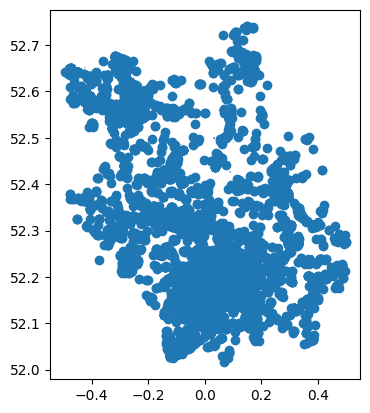

In [17]:
pois.plot()

# Network Analysis

In [18]:
from pyrosm import OSM, get_data
import geopandas as gpd
import pandas as pd
from sklearn.neighbors import BallTree
import numpy as np
import mapclassify as mc
import matplotlib.pyplot as plt
import time

def get_igraph_nodes(G):
    """Retrieves a frame from nodes of the igaph"""
    attributes = G.vs.attribute_names()
    if len(attributes) == 0:
        raise ValueError("Nodes does not have data.")
    data = {name: G.vs[name] for name in attributes}
    if "geometry" in attributes:
        return gpd.GeoDataFrame(data, 
                                geometry="geometry", 
                                crs="epsg:4326")
    return pd.DataFrame(data)

def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""
    tree = BallTree(candidates, leaf_size=15, metric='haversine')
    distances, indices = tree.query(src_points, k=k_neighbors)
    distances = distances.transpose()
    indices = indices.transpose()
    closest = indices[0]
    closest_dist = distances[0]
    return (closest, closest_dist)

def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.
    
    For further info, take a look this lesson: 
        https://autogis-site.readthedocs.io/en/latest/notebooks/L3/06_nearest-neighbor-faster.html
    """
    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name
    right = right_gdf.copy().reset_index(drop=True)
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: 
                                                          (geom.x * np.pi / 180, geom.y * np.pi / 180)
                                                         ).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: 
                                                         (geom.x * np.pi / 180, geom.y * np.pi / 180)
                                                        ).to_list())
    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)
    closest_points = right.loc[closest]
    closest_points = closest_points.reset_index(drop=True)
    if return_dist:
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius
    return closest_points

def find_nearest_nodeids(nodes, src_gdf):
    """Finds the nearest node-ids for all points in 'src_gdf'."""
    nearest = nearest_neighbor(src_gdf, nodes, return_dist=True)
    return list(set(nearest["node_id"].values)), nearest["distance"].values

In [19]:
nodes, edges = cambridgeshire_osm.get_network(nodes=True)
nodes = nodes.cx[cambridgeshire_bbox[0]:cambridgeshire_bbox[2], cambridgeshire_bbox[1]:cambridgeshire_bbox[3]]
edges = edges.cx[cambridgeshire_bbox[0]:cambridgeshire_bbox[2], cambridgeshire_bbox[1]:cambridgeshire_bbox[3]]

In [20]:
G = cambridgeshire_osm.to_graph(nodes, edges)
nodes = get_igraph_nodes(G)
x['geometry'] = x['geometry'].centroid
src_ids, euclidean_distance = find_nearest_nodeids(nodes, x)

/tmp/ipykernel_3792715/2103145922.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x['geometry'] = x['geometry'].centroid
/maps/acz25/miniconda3/envs/nature-urban-geo-env/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [22]:
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
%%timeit
# Keep track of how many new columns are inserted to the frame
src_cnt = len(src_ids)

# Iterate over hospitals and calculate the network distances
# Note: this could also be run by passing all `src_ids` at once 
# to the shortest_paths_dijkstra -function. 
for src_id, distance_to_closest_node in zip(src_ids, euclidean_distance):
    #print(f"Calculate shortest paths to {src_id}")
    
    # Calculate shortest path lengths to given locations
    path_lengths = G.shortest_paths_dijkstra(source=src_id, weights="length", mode="IN")
    
    # Add the euclidean distance between the hospital and closest node in the network 
    # to keep track of the door-to-door travel distance
    path_lengths = np.array(path_lengths) + distance_to_closest_node

    # Attach the path lenghts to nodes
    nodes[f"distance_to_{src_id}"] = path_lengths[0]

<magic-timeit>:11: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead


13min 20s ± 10.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
nodes["distance_to_closest"] = nodes.iloc[:, -src_cnt:].min(axis=1)

buildings["centroid"] = buildings.centroid
buildings = buildings.set_geometry("centroid")

# Note: With ~900000 x ~830000 point pairs, 
# this takes awhile to solve. 
# Also keep track of the distance between the points.
closest = nearest_neighbor(buildings, nodes, return_dist=True)
buildings["node_id"] = closest["node_id"]
buildings["distance_to_closest_node"] = closest["distance"]

/maps/acz25/miniconda3/envs/nature-urban-geo-env/lib/python3.10/site-packages/geopandas/geodataframe.py:1528: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/tmp/ipykernel_3460987/3764496316.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings["centroid"] = buildings.centroid


In [23]:
# Link the distance information
access = buildings.merge(nodes[["distance_to_closest", "node_id"]], on="node_id")

# Add the (Euclidean) distance between building 
# and the closest node in the road network to get a full "door-to-door" distance
access["distance"] = access["distance_to_closest"] + access["distance_to_closest_node"]

# Calculate distance in kilometers (meters by default)
access["distance_km"] = (access["distance"]).round(1)

access = access.loc[access["distance_to_closest_node"]<=5000]

In [24]:
upper_boundary_distance = 300
width = 5

# Use self-defined classification
classifier = mc.UserDefined(access["distance_km"], bins=[x for x in range(0, int(upper_boundary_distance)+1, width)])
access["cls"] = access[["distance_km"]].apply(classifier)
# Replace the class numbers to distance categories (e.g. 0-2, 2-4 .. km etc.)
access["travel_distance"] = access["cls"].replace({k: v 
                                                   for k, v in 
                                                   zip([x for x in range(len(classifier.bins))], 
                                                       classifier.bins)})

# Set all values over 50 km as 51 (to improve how the colorscale works)
access.loc[access["travel_distance"] > upper_boundary_distance, "travel_distance"] = upper_boundary_distance + 1

# Convert the observation counts as percentages
classifier.counts = (classifier.counts / classifier.counts.sum()).round(3)

# Convert stats to dataframe
bins = classifier.bins.astype(int)
categories = np.vstack([bins[:-1], bins[1:]]).T
categories = [f"{low}-{high}" for low, high in categories]
access_zone_classes = pd.DataFrame({"Distance": categories, "% of buildings": classifier.counts[1:]})

/maps/acz25/miniconda3/envs/nature-urban-geo-env/lib/python3.10/site-packages/mapclassify/classifiers.py:940: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/maps/acz25/miniconda3/envs/nature-urban-geo-env/lib/python3.10/site-packages/mapclassify/classifiers.py:970: RuntimeWarning: invalid value encountered in scalar divide
  gadf = 1 if adam == 0 else 1 - self.adcm / adam
/tmp/ipykernel_3460987/77626537.py:20: RuntimeWarning: invalid value encountered in cast
  bins = classifier.bins.astype(int)


In [25]:
bbox = (0.0832801893932137, 52.17136602602202, 0.17260565517499638, 52.242143287773615)

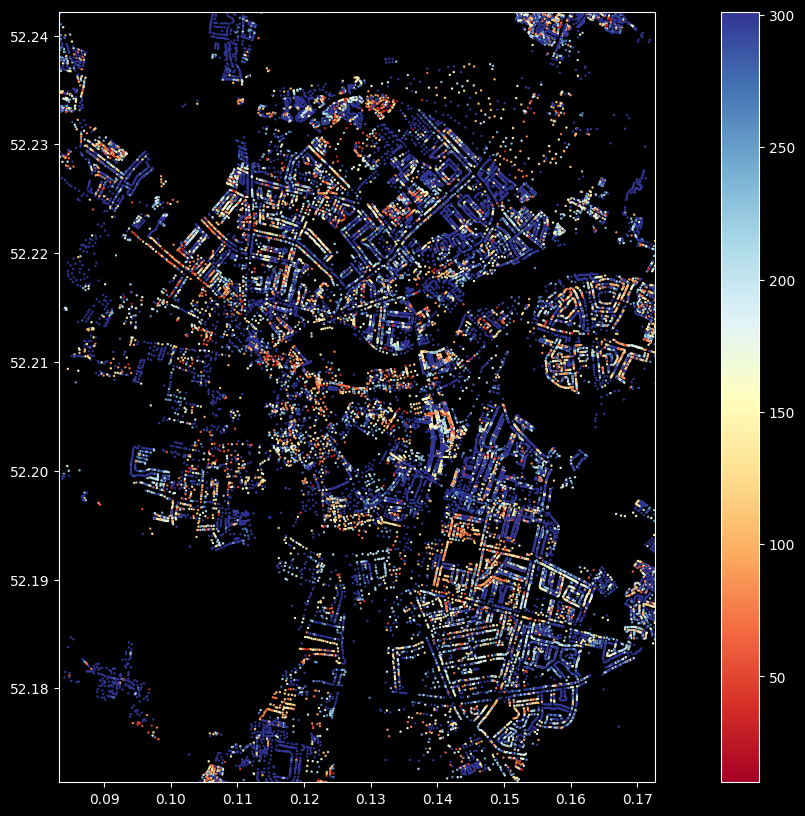

In [26]:
plt.style.use('dark_background')
ax = access.plot(column="travel_distance", markersize=0.5, legend=True, cmap="RdYlBu", figsize=(17,10))
# Adjust the map extent
# ax.set_xlim(cambridgeshire_bbox[0], cambridgeshire_bbox[2])
# ax.set_ylim(cambridgeshire_bbox[1], cambridgeshire_bbox[3])
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])
plt.savefig("../images/cambridge_park_walking_distance.png")

In [ ]:
access.to_file('green_proximity.shp')